In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
import sys

# Suppress warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 2.2.5
Matplotlib version: 3.10.3
Seaborn version: 0.13.2


In [4]:
print("\n" + "=" * 60)
print("CELL 2: Load and Explore Trustpilot Data")
print("=" * 60)

# Check if file exists
trustpilot_file = 'data/Headway_Appstore_metrics - Trustpilot_reviews.csv'
if not os.path.exists(trustpilot_file):
    print(f"Error: {trustpilot_file} not found!")
    sys.exit(1)

# Load Trustpilot reviews
try:
    trustpilot_df = pd.read_csv(trustpilot_file)
    print("✅ Trustpilot data loaded successfully!")
except Exception as e:
    print(f"Error loading Trustpilot data: {e}")
    sys.exit(1)

print("\n=== TRUSTPILOT DATASET OVERVIEW ===")
print(f"Shape: {trustpilot_df.shape}")
print(f"Columns: {list(trustpilot_df.columns)}")
print("\nFirst 5 rows:")
print(trustpilot_df.head())

print("\nData types:")
print(trustpilot_df.dtypes)

print("\nMissing values:")
print(trustpilot_df.isnull().sum())


CELL 2: Load and Explore Trustpilot Data
✅ Trustpilot data loaded successfully!

=== TRUSTPILOT DATASET OVERVIEW ===
Shape: (3640, 11)
Columns: ['Review Id', 'Review Created (UTC)', 'Review Consumer User Id', 'Review Title', 'Review Content', 'Review Stars', 'Source Of Review', 'Company Response', 'Company Response Author', 'Review Language', 'Company Reply Date (UTC)']

First 5 rows:
                  Review Id Review Created (UTC)   Review Consumer User Id  \
0  6854bd105459fc1b547e6a0d      2025-06-20 3:44  5fe91f3534b0e20019c8a277   
1  6854b9b4a3d4c9597d832391      2025-06-20 3:30  6854b9b3f0e9f3f474794e98   
2  685438f697e40ab9669a68ab     2025-06-19 18:21  685438ebf0e9f3114f78c9c7   
3  6853158b0ca0017711dd43a1     2025-06-18 21:37  671901014f7c203a1178a8ed   
4  6852347998354cacb91a74ef      2025-06-18 5:37  685234792824b59ef115e0d6   

                                  Review Title  \
0                             Easy and helpful   
1     This app brings new way of reading b

In [14]:
print("\n" + "=" * 60)
print("CELL 3: Load and Explore App Store Data")
print("=" * 60)

# Check if file exists
appstore_file = 'data/Headway_Appstore_metrics - AppStore_reviews.csv'
if not os.path.exists(appstore_file):
    print(f"Error: {appstore_file} not found!")
    sys.exit(1)

# Load App Store reviews
try:
    appstore_df = pd.read_csv(appstore_file)
    print("✅ App Store data loaded successfully!")
except Exception as e:
    print(f"Error loading App Store data: {e}")
    sys.exit(1)

print("\n=== APP STORE DATASET OVERVIEW ===")
print(f"Shape: {appstore_df.shape}")
print(f"Columns: {list(appstore_df.columns)}")
print("\nFirst 5 rows:")
print(appstore_df.head())

print("\nData types:")
print(appstore_df.dtypes)

print("\nMissing values:")
print(appstore_df.isnull().sum())


CELL 3: Load and Explore App Store Data
✅ App Store data loaded successfully!

=== APP STORE DATASET OVERVIEW ===
Shape: (10441, 11)
Columns: ['id', 'rating', 'title', 'content', 'date_comment', 'country', 'language', 'app_name', 'en_title', 'en_content', 'dt']

First 5 rows:
                                     id  rating  \
0  00000056-dae4-2802-81db-b70600000000       1   
1  00000056-dae4-2802-8211-abef00000000       1   
2  00000056-dae4-2802-8208-eea200000000       1   
3  00000056-dae4-2802-8212-ec9100000000       1   
4  00000056-dae4-2802-8215-b55600000000       1   

                                               title  \
0                                         Total scam   
1                                TRIPLE CHARGED-SCAM   
2  Ridiculously long and unnecessary onboarding f...   
3                                             BEWARE   
4        Low Level content, unsubscribe doesn‘t work   

                                             content  \
0  this app is the wor

In [29]:
# 1. Select and rename columns for App Store data
appstore_std = appstore_df[['id', 'rating', 'date_comment', 'language' ,'en_title', 'en_content']].copy()
appstore_std.rename(columns={'en_content': 'description'}, inplace=True)
appstore_std.rename(columns={'en_title': 'title'}, inplace=True)
appstore_std['source'] = 'App Store'

# 2. Select and rename columns for Trustpilot data
trustpilot_std = trustpilot_df[['Review Id', 'Review Created (UTC)','Review Stars', 'Review Title', 'Review Content', 'Review Language']].copy()
trustpilot_std.rename(columns={
    'Review Stars': 'rating',
    'Review Created (UTC)': 'date_comment',
    'Review Language': 'language',
    'Review Id': 'id',
    'Review Title': 'title',
    'Review Content': 'description'
}, inplace=True)
trustpilot_std['source'] = 'Trustpilot'

# 3. Combine the two standardized DataFrames
combined_reviews_df = pd.concat([appstore_std, trustpilot_std], ignore_index=True)

# 4. Ensure 'description' and 'title' are strings and handle potential empty values
combined_reviews_df['description'] = combined_reviews_df['description'].astype(str).fillna('')
combined_reviews_df['title'] = combined_reviews_df['title'].astype(str).fillna('')


print("Cell 3/4: Data standardized and combined successfully.")

Cell 3/4: Data standardized and combined successfully.


In [30]:
combined_reviews_df.to_csv('combined_reviews.csv', index=False)

In [31]:
original_row_count = len(combined_reviews_df)
# --- Step 1: Split descriptions into lists of sentences ---
# We'll work on a copy to keep the original combined_reviews_df intact.
# The regex r'(?<=[.!?])\s+' splits the text after a punctuation mark, keeping the punctuation.
df_to_expand = combined_reviews_df[combined_reviews_df['description'].str.strip() != ''].copy()
df_to_expand['sentence_list'] = df_to_expand['description'].str.split(r'(?<=[.!?])\s+|\n+')


# --- Step 2: Explode the DataFrame ---
# The .explode() method creates a new row for each item in the 'sentence_list'.
expanded_df = df_to_expand.explode('sentence_list')


# --- Step 3: Clean up the new DataFrame ---
# Rename the new column for clarity and remove the original 'description'
expanded_df.rename(columns={'sentence_list': 'sentence'}, inplace=True)
expanded_df.drop(columns=['description'], inplace=True)

# Clean up sentence whitespace and remove any empty rows that resulted from the split
expanded_df['sentence'] = expanded_df['sentence'].str.strip()
expanded_df.dropna(subset=['sentence'], inplace=True)
expanded_df = expanded_df[expanded_df['sentence'] != '']

# Reset the index for a clean final DataFrame
expanded_df.reset_index(drop=True, inplace=True)
final_row_count = len(expanded_df)


# --- Step 4: Display the results ---
print("Expansion complete!")
print(f"Original number of reviews: {original_row_count:,}")
print(f"New expanded number of rows (sentences): {final_row_count:,}")
print(f"An increase of {final_row_count - original_row_count:,} rows.")
print("\n" + "="*50)

print("First 10 rows of the newly expanded dataset:")
print(expanded_df.head(10))
print("\n" + "="*50)

print("A sample from the middle of the dataset:")
expanded_df.iloc[1000:1005]


Expansion complete!
Original number of reviews: 14,081
New expanded number of rows (sentences): 34,956
An increase of 20,875 rows.

First 10 rows of the newly expanded dataset:
                                     id  rating               date_comment  \
0  00000056-dae4-2802-81db-b70600000000       1  2023-12-31T16:02:00-08:00   
1  00000056-dae4-2802-81db-b70600000000       1  2023-12-31T16:02:00-08:00   
2  00000056-dae4-2802-81db-b70600000000       1  2023-12-31T16:02:00-08:00   
3  00000056-dae4-2802-81db-b70600000000       1  2023-12-31T16:02:00-08:00   
4  00000056-dae4-2802-8211-abef00000000       1  2024-01-01T13:10:06-08:00   
5  00000056-dae4-2802-8211-abef00000000       1  2024-01-01T13:10:06-08:00   
6  00000056-dae4-2802-8208-eea200000000       1  2024-01-01T09:51:29-08:00   
7  00000056-dae4-2802-8208-eea200000000       1  2024-01-01T09:51:29-08:00   
8  00000056-dae4-2802-8212-ec9100000000       1  2024-01-01T13:41:17-08:00   
9  00000056-dae4-2802-8212-ec9100000000    

,id,rating,date_comment,language,title,source,sentence
1000,00000056-dae4-2802-82e9-d6e800000000,1,2024-01-05T02:25:15-08:00,english,This is an SCAM,App Store,Please don’t buy it .
1001,00000056-dae4-2802-82e9-d6e800000000,1,2024-01-05T02:25:15-08:00,english,This is an SCAM,App Store,It is an scam
1002,00000056-dae4-2802-82e9-d6e800000000,1,2024-01-05T02:25:15-08:00,english,This is an SCAM,App Store,I paid in November and I still haven’t the acc...
1003,00000056-dae4-2802-82f6-f42300000000,1,2024-01-05T06:53:20-08:00,english,Beware of the scam,App Store,This company lures you into doing a trial and ...
1004,00000056-dae4-2802-82f6-f42300000000,1,2024-01-05T06:53:20-08:00,english,Beware of the scam,App Store,This is a dishonest and immoral behaviour.


In [32]:
expanded_df.to_csv('expanded_df.csv', index=False)

In [6]:
print("\n" + "=" * 60)
print("CELL 4: Data Cleaning and Preprocessing")
print("=" * 60)

def clean_dates(df, date_column):
    """Convert date column to datetime format"""
    try:
        df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
        print(f"✅ Converted {date_column} to datetime")
        return df
    except Exception as e:
        print(f"❌ Could not convert {date_column} to datetime: {e}")
        return df

def extract_rating(rating_text):
    """Extract numeric rating from text"""
    if pd.isna(rating_text):
        return None
    try:
        import re
        numbers = re.findall(r'\d+', str(rating_text))
        if numbers:
            return int(numbers[0])
    except:
        pass
    return None

def find_rating_column(df, dataset_name):
    """Find rating column in dataset"""
    rating_columns = ['rating', 'score', 'stars', 'review_rating', 'user_rating']
    for col in rating_columns:
        if col in df.columns:
            print(f"✅ Found rating column '{col}' in {dataset_name}")
            return col
    print(f"❌ No rating column found in {dataset_name}")
    return None

def find_date_column(df, dataset_name):
    """Find date column in dataset"""
    date_columns = ['date', 'created_at', 'timestamp', 'review_date', 'submitted_at', 'published_date']
    for col in date_columns:
        if col in df.columns:
            print(f"✅ Found date column '{col}' in {dataset_name}")
            return col
    print(f"❌ No date column found in {dataset_name}")
    return None

def find_text_column(df, dataset_name):
    """Find text column in dataset"""
    text_columns = ['review', 'text', 'comment', 'content', 'message', 'review_text', 'body']
    for col in text_columns:
        if col in df.columns:
            print(f"✅ Found text column '{col}' in {dataset_name}")
            return col
    print(f"❌ No text column found in {dataset_name}")
    return None

# Find columns in both datasets
print("🔍 Identifying columns in datasets...")
trustpilot_rating_col = find_rating_column(trustpilot_df, 'Trustpilot')
trustpilot_date_col = find_date_column(trustpilot_df, 'Trustpilot')
trustpilot_text_col = find_text_column(trustpilot_df, 'Trustpilot')

appstore_rating_col = find_rating_column(appstore_df, 'App Store')
appstore_date_col = find_date_column(appstore_df, 'App Store')
appstore_text_col = find_text_column(appstore_df, 'App Store')

# Clean dates if found
if trustpilot_date_col:
    trustpilot_df = clean_dates(trustpilot_df, trustpilot_date_col)
if appstore_date_col:
    appstore_df = clean_dates(appstore_df, appstore_date_col)

print("✅ Data cleaning completed!")


CELL 4: Data Cleaning and Preprocessing
🔍 Identifying columns in datasets...
❌ No rating column found in Trustpilot
❌ No date column found in Trustpilot
❌ No text column found in Trustpilot
✅ Found rating column 'rating' in App Store
❌ No date column found in App Store
✅ Found text column 'content' in App Store
✅ Data cleaning completed!


In [7]:
print("\n" + "=" * 60)
print("CELL 5: Basic Statistics and Summary")
print("=" * 60)

print("=== DATASET COMPARISON ===")
print(f"Trustpilot reviews: {len(trustpilot_df):,}")
print(f"App Store reviews: {len(appstore_df):,}")
print(f"Total reviews: {len(trustpilot_df) + len(appstore_df):,}")

print("\n=== TRUSTPILOT STATISTICS ===")
print(trustpilot_df.describe(include='all'))

print("\n=== APP STORE STATISTICS ===")
print(appstore_df.describe(include='all'))


CELL 5: Basic Statistics and Summary
=== DATASET COMPARISON ===
Trustpilot reviews: 3,640
App Store reviews: 10,441
Total reviews: 14,081

=== TRUSTPILOT STATISTICS ===
                       Review Id Review Created (UTC)  \
count                       3640                 3640   
unique                      3640                 3611   
top     6854bd105459fc1b547e6a0d     2024-12-22 16:45   
freq                           1                    3   
mean                         NaN                  NaN   
std                          NaN                  NaN   
min                          NaN                  NaN   
25%                          NaN                  NaN   
50%                          NaN                  NaN   
75%                          NaN                  NaN   
max                          NaN                  NaN   

         Review Consumer User Id Review Title     Review Content  \
count                       3640         3640               3640   
unique   


CELL 6: Rating Analysis and Visualization


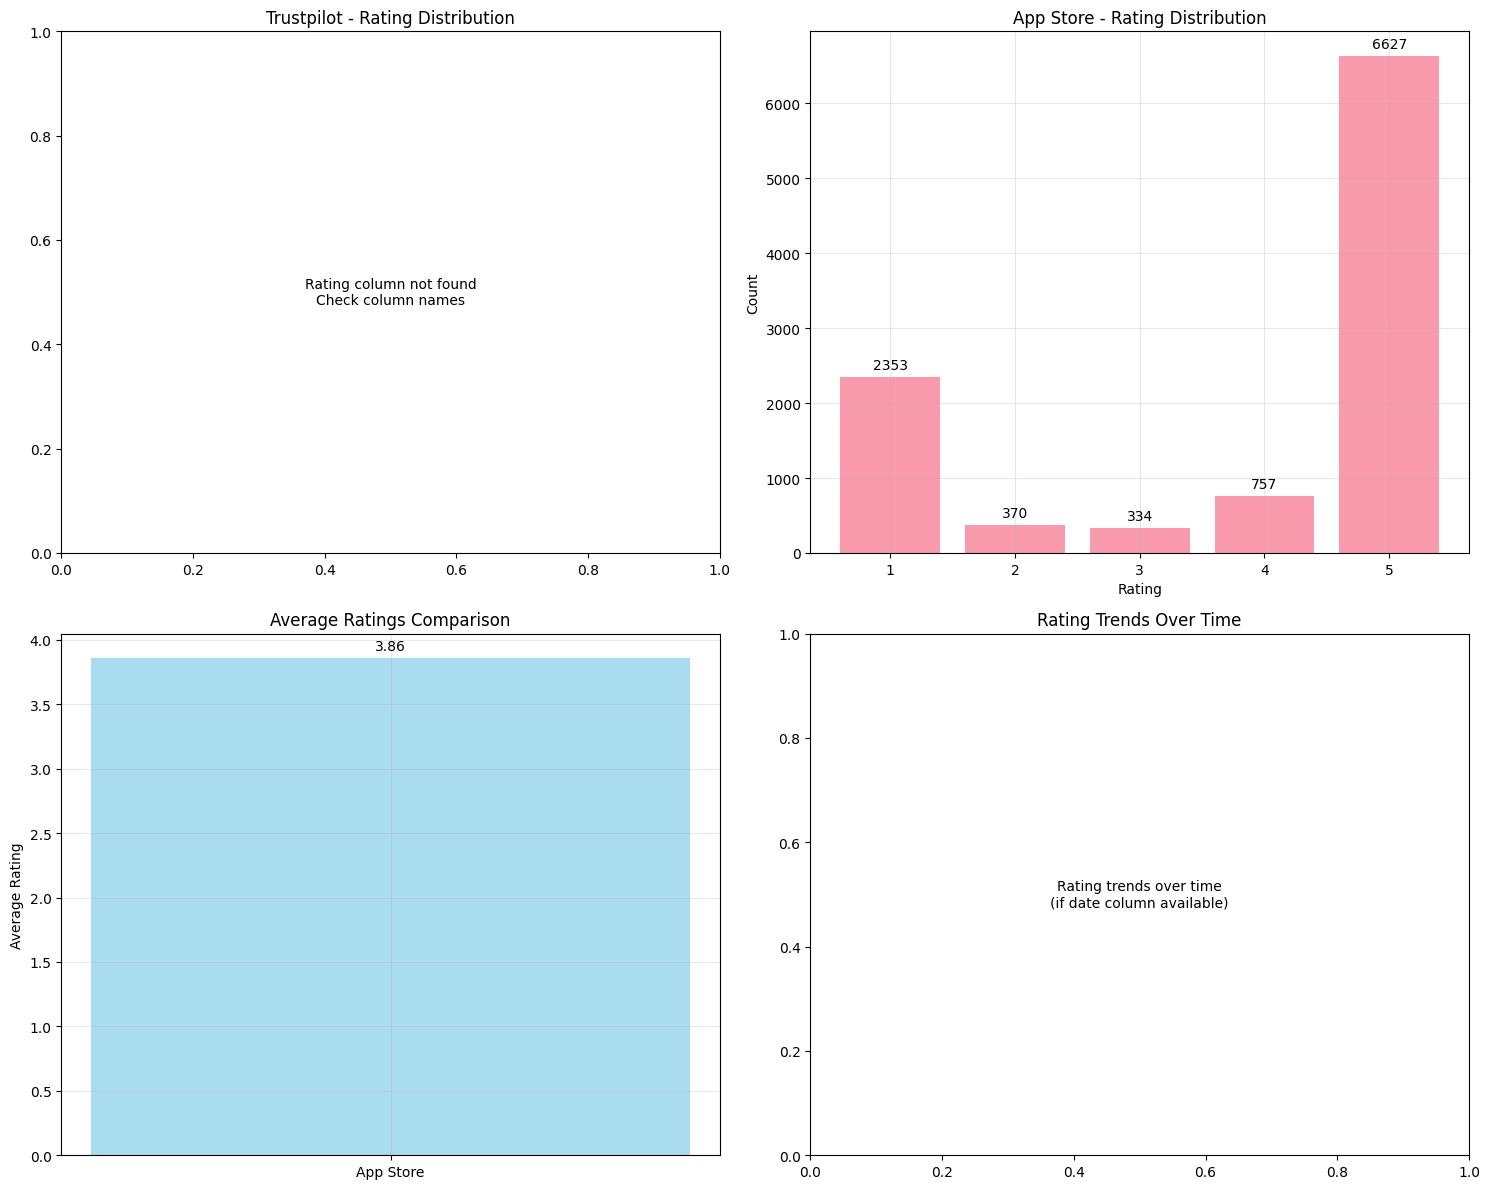


=== RATING SUMMARY ===
App Store average rating: 3.86
App Store median rating: 5.00
App Store rating std: 1.68


In [8]:
print("\n" + "=" * 60)
print("CELL 6: Rating Analysis and Visualization")
print("=" * 60)

def plot_rating_distribution(df, rating_col, title, ax):
    """Plot rating distribution"""
    if rating_col and rating_col in df.columns:
        rating_counts = df[rating_col].value_counts().sort_index()
        ax.bar(rating_counts.index, rating_counts.values, alpha=0.7)
        ax.set_title(f'{title} - Rating Distribution')
        ax.set_xlabel('Rating')
        ax.set_ylabel('Count')
        ax.grid(True, alpha=0.3)
        
        # Add count labels on bars
        for i, v in enumerate(rating_counts.values):
            ax.text(rating_counts.index[i], v + max(rating_counts.values)*0.01, 
                   str(v), ha='center', va='bottom')
    else:
        ax.text(0.5, 0.5, f'Rating column not found\nCheck column names', 
               ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{title} - Rating Distribution')

# Create rating analysis visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot rating distributions
plot_rating_distribution(trustpilot_df, trustpilot_rating_col, 'Trustpilot', axes[0,0])
plot_rating_distribution(appstore_df, appstore_rating_col, 'App Store', axes[0,1])

# Average ratings comparison
avg_ratings = []
labels = []

if trustpilot_rating_col and trustpilot_rating_col in trustpilot_df.columns:
    avg_trustpilot = trustpilot_df[trustpilot_rating_col].mean()
    avg_ratings.append(avg_trustpilot)
    labels.append('Trustpilot')
    
if appstore_rating_col and appstore_rating_col in appstore_df.columns:
    avg_appstore = appstore_df[appstore_rating_col].mean()
    avg_ratings.append(avg_appstore)
    labels.append('App Store')

if avg_ratings:
    axes[1,0].bar(labels, avg_ratings, color=['skyblue', 'lightgreen'], alpha=0.7)
    axes[1,0].set_title('Average Ratings Comparison')
    axes[1,0].set_ylabel('Average Rating')
    axes[1,0].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(avg_ratings):
        axes[1,0].text(i, v + max(avg_ratings)*0.01, f'{v:.2f}', 
                      ha='center', va='bottom')

# Rating trends over time placeholder
axes[1,1].text(0.5, 0.5, 'Rating trends over time\n(if date column available)', 
               ha='center', va='center', transform=axes[1,1].transAxes)
axes[1,1].set_title('Rating Trends Over Time')

plt.tight_layout()
plt.savefig('rating_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n=== RATING SUMMARY ===")
if trustpilot_rating_col and trustpilot_rating_col in trustpilot_df.columns:
    print(f"Trustpilot average rating: {trustpilot_df[trustpilot_rating_col].mean():.2f}")
    print(f"Trustpilot median rating: {trustpilot_df[trustpilot_rating_col].median():.2f}")
    print(f"Trustpilot rating std: {trustpilot_df[trustpilot_rating_col].std():.2f}")
    
if appstore_rating_col and appstore_rating_col in appstore_df.columns:
    print(f"App Store average rating: {appstore_df[appstore_rating_col].mean():.2f}")
    print(f"App Store median rating: {appstore_df[appstore_rating_col].median():.2f}")
    print(f"App Store rating std: {appstore_df[appstore_rating_col].std():.2f}")

In [9]:
print("\n" + "=" * 60)
print("CELL 7: Text Analysis and Sentiment Overview")
print("=" * 60)

def analyze_text_column(df, text_column, dataset_name):
    """Analyze text column for basic statistics"""
    if not text_column or text_column not in df.columns:
        print(f"{dataset_name}: {text_column} column not found")
        return
    
    print(f"\n=== {dataset_name.upper()} TEXT ANALYSIS ===")
    
    # Remove null values
    text_data = df[text_column].dropna()
    print(f"Number of reviews with text: {len(text_data)}")
    
    if len(text_data) > 0:
        # Word count analysis
        word_counts = text_data.str.split().str.len()
        print(f"Average words per review: {word_counts.mean():.1f}")
        print(f"Median words per review: {word_counts.median():.1f}")
        print(f"Min words: {word_counts.min()}")
        print(f"Max words: {word_counts.max()}")
        
        # Character count analysis
        char_counts = text_data.str.len()
        print(f"Average characters per review: {char_counts.mean():.1f}")
        print(f"Median characters per review: {char_counts.median():.1f}")
        
        # Show sample reviews
        print(f"\nSample reviews from {dataset_name}:")
        for i, review in enumerate(text_data.head(3)):
            print(f"{i+1}. {review[:200]}{'...' if len(review) > 200 else ''}")

# Analyze text columns
analyze_text_column(trustpilot_df, trustpilot_text_col, 'Trustpilot')
analyze_text_column(appstore_df, appstore_text_col, 'App Store')


CELL 7: Text Analysis and Sentiment Overview
Trustpilot: None column not found

=== APP STORE TEXT ANALYSIS ===
Number of reviews with text: 10440
Average words per review: 31.2
Median words per review: 21.0
Min words: 1
Max words: 699
Average characters per review: 172.4
Median characters per review: 117.0

Sample reviews from App Store:
1. this app is the worst! please avoid it at any cost. i’ve been charged a few times without any consent and awareness and left with no feedback from their customer service even though i’ve tried to reac...
2. i was charged my membership fee 3 times for one month and there is no way for me to get my money back as i have contacted support but there is no response. scam
3. i thought this was an app that would let me simply pay for summaries of books that i did not have time to read. however, it uses an absurdly long onboarding flow to do a psych evaluation.


Trustpilot: None column not found
